# 9.4.0 Ejemplos

In [1]:
import numpy as np
from scipy.stats import multinomial, multivariate_normal
import matplotlib.pyplot as plt

## Ejemplo de clasificador generativo

Sean $\;C=2$, $\;x\in[0,1]$ y los priors y condicionales siguientes:
$$\begin{align*}
p(y=1)&=p(y=2)=0.5&&\text{(clases equiprobables)}\\%
p(x\mid y=1)&=0.6\,\mathcal{N}(\mu=0.1, \sigma=0.09)+0.4\,\mathcal{N}(\mu=0.4, \sigma=0.09)%
&&\text{(mixtura de dos normales)}\\%
p(x\mid y=2)&=\mathcal{N}(\mu=0.7, \sigma=0.09)&&\text{(normal)}%
\end{align*}$$

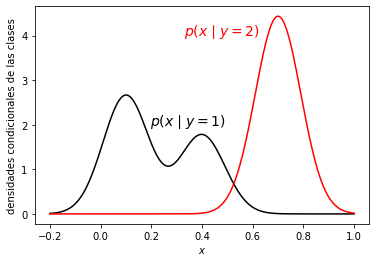

In [2]:
X = np.arange(-0.200, 1.001, 0.001)
def p1(x): return 0.6 * multivariate_normal.pdf(x, 0.1, 0.09**2) + 0.4 * multivariate_normal.pdf(x, 0.4, 0.09**2)
def p2(x): return multivariate_normal.pdf(x, 0.7, 0.09**2)
plt.plot(X, p1(X), '-k', X, p2(X), '-r')
plt.xlabel('$x$')
plt.ylabel('densidades condicionales de las clases')
plt.annotate('$p(x\mid y=1)$', (0.196, 2), fontsize=14)
plt.annotate('$p(x\mid y=2)$', (0.33, 4), fontsize=14, color='red')
plt.show()

Generación de datos sintéticos de acuerdo con la distribución conjunta:
$$\begin{align*}
p(x, y)&=p(y)\,p(x\mid y)&&\text{(primero generamos $y$ y luego $x$ dado $y$)}\\%
p(y)&=\operatorname{Cat}(0.5, 0.5)&&\text{($y$ se genera simulando una categórica)}\\%
p(x\mid y=2)&=\mathcal{N}(0.7, 0.09^2)&&\text{(si $y=2$, $x$ es es un número aleatorio normal)}\\%
\end{align*}$$
La condicional de la clase $1$ puede expresarse en términos de una etiqueta de subclase "perdida", $z\in\{1,2\}$:
$$\begin{align*}
p(x\mid y=1)&=p(x, z=1\mid y=1)+p(x, z=2\mid y=1)\\%
&=p(z=1\mid y=1)\,p(x\mid y=1, z=1)+p(z=2\mid y=1)\,p(x\mid y=1, z=2)\\%
p(z\mid y=1)&=\operatorname{Cat}(0.6, 0.4)\\%
p(x\mid y=1, z=1)&=\mathcal{N}(0.1, 0.09^2)\\%
p(x\mid y=1, z=2)&=\mathcal{N}(0.4, 0.09^2)%
\end{align*}$$

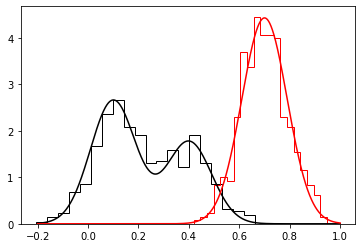

In [3]:
N = 1000
yy = multinomial(1, [0.5, 0.5]).rvs(N)
N1 = yy[yy[:, 0] == 1].shape[0]
zz_y1 = multinomial(1, [0.6, 0.4]).rvs(N1)
N1_y1 = zz_y1[zz_y1[:, 0] == 1].shape[0]
xx_y1_z1 = multivariate_normal(0.1, 0.09**2).rvs(N1_y1)
xx_y1_z2 = multivariate_normal(0.4, 0.09**2).rvs(N1 - N1_y1)
xx_y2 = multivariate_normal(0.7, 0.09**2).rvs(N - N1)
plt.hist(np.hstack((xx_y1_z1, xx_y1_z2)), bins=20, density=True, histtype='step', ec="black")
plt.hist(np.hstack((xx_y2)), bins=20, density=True, histtype='step', ec="red")
plt.plot(X, p1(X), '-k', X, p2(X), '-r');

## Ejemplo de clasificador discriminativo

Seguimos con $\;C=2$ y $\;x\in[0,1]$, pero no conocemos priors ni densidades condicionales; no obstante, tenemos modelos sencillos de posteriors que producen las mismas regiones y frontera que el ejemplo generativo:
$$\begin{align*}
p(y=1\mid\boldsymbol{x})&=\frac{1}{1+\exp(27x-15)}\\%
p(y=2\mid\boldsymbol{x})&=\frac{1}{1+\exp(-27x+15)}%
\end{align*}$$

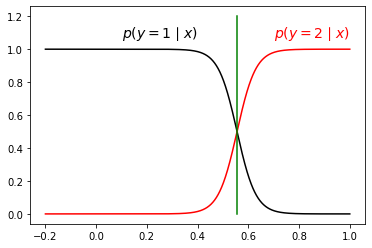

In [4]:
def p1(x): return 1/(1 + np.exp((27*x-15)))
def p2(x): return 1/(1 + np.exp((-27*x+15)))
plt.plot(X, p1(X), '-k')
plt.plot(X, p2(X), '-r')
plt.plot([0.556, 0.556], [0, 1.2], '-g')
plt.annotate('$p(y=1\mid x)$', (0.1, 1.07), fontsize=14)
plt.annotate('$p(y=2\mid x)$', (0.7, 1.07), fontsize=14, color='red');